In [1]:
import numpy as np
import pandas as pd

# Q1

In [2]:
data = pd.read_csv(r"E:\course\資料分析\Homework\hw5\auto-mpg.data.csv")
X=data.to_numpy()

In [3]:
def FA(dataMat, factor_number):
    meanVals = np.mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals
    covMat = np.cov(meanRemoved, rowvar=0)
    eigVal, eigVect = np.linalg.eig(np.mat(covMat))
    selected_eigenvalue = eigVal[:factor_number]
    eigenvalues_diagonal = np.zeros((eigVal.shape[0], eigVal.shape[0]), float)   
    np.fill_diagonal(eigenvalues_diagonal, eigVal)
    eigenvalues_diagonal_total_sqrt = np.sqrt(eigenvalues_diagonal)
    All_T =   eigVect @ eigenvalues_diagonal_total_sqrt
    All = All_T.T
    X_variance = np.diag(np.diag(All_T @ All))
    eigenvalues_diagonal = np.zeros((factor_number, factor_number), float)
    np.fill_diagonal(eigenvalues_diagonal, eigVal[:factor_number])
    eigenvalues_diagonal_sqrt = np.sqrt(eigenvalues_diagonal)
    A_T = eigVect[:, :factor_number] @ eigenvalues_diagonal_sqrt
    A = A_T.T
    Psi = X_variance - A_T @ A
    Psi_inverse = np.linalg.inv(Psi)
    inner = np.linalg.inv(A @ (Psi_inverse) @ (A_T))
    F = dataMat @ Psi_inverse @ (A_T) @ (inner)
    communality_vector = np.sum(A_T @ A, axis=0)
    
    return F, A,communality_vector, Psi,eigVal, eigVect, selected_eigenvalue 

In [4]:
F, A,communality_vector, Psi,eigVal, eigVect, selected_eigenvalue = FA(X, 2)

In [5]:
Total_eigenvalues = eigVal.sum()
for i in range(0,len(selected_eigenvalue)):
    print("Factor",i+1,"contribute",format(selected_eigenvalue[i]*100/Total_eigenvalues,'2.2f'),"%")

Factor 1 contribute 99.75 %
Factor 2 contribute 0.21 %


與 PCA 的結果差不多

In [6]:
print("\nFactor matrix:\n",F)
print("\nLoading matrix:\n",A)
print("\nCommunality Vector:\n",communality_vector)
print("\nUniqueness Vector:\n",np.diagonal(Psi,offset=0))


Factor matrix:
 [[  5.51075801 -17.20694096]
 [  5.84309262 -17.04290417]
 [  5.44648509 -16.49927605]
 [  5.6108272  -17.14686803]
 [  5.39618117 -16.44680879]
 [  6.24655084 -16.64044471]
 [  6.28905132 -16.03542693]
 [  6.18514154 -15.81991787]
 [  6.44627837 -16.565219  ]
 [  5.75219402 -15.51915938]
 [  5.66839146 -16.04021188]
 [  5.45954027 -15.39296484]
 [  5.6851079  -16.09248313]
 [  5.6839238  -15.00569995]
 [  3.98276178 -18.17615659]
 [  4.93825521 -18.62188547]
 [  5.07254599 -18.79442508]
 [  4.85871444 -18.68990668]
 [  3.63622215 -17.5535825 ]
 [  4.13437644 -20.40913892]
 [  4.49400437 -19.73473664]
 [  4.10288482 -18.07224245]
 [  4.34413057 -19.36184309]
 [  3.79802212 -16.58190984]
 [  4.80827283 -18.25645641]
 [  6.98693916 -19.3154497 ]
 [  6.84965508 -19.76941507]
 [  6.70575971 -18.90188446]
 [  7.41720186 -21.97400256]
 [  3.66251621 -17.71343661]
 [  4.16654473 -18.17804214]
 [  3.78696081 -17.62536857]
 [  4.77200991 -17.40849258]
 [  5.60939292 -19.7287656

# Q2

In [7]:
import matplotlib.pyplot as plt
from PIL import Image
from numpy import array
from tkinter import _flatten

In [8]:
X = np.zeros((400, 2576))
for j in range(0, 40):
    for i in range(0, 10):
        image = Image.open(r"E:\course\資料分析\Homework\HW6\ORL Faces\%s_%s.png" %(j+1, i+1))
        image_array = array(image)
        X[i+j*10] = image_array.flatten()

In [9]:
def FA(dataMat, factor_number):
    meanVals = np.mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals
    covMat = np.cov(meanRemoved, rowvar=0)
    eigVal, eigVect = np.linalg.eig(np.mat(covMat))
    selected_eigenvalue = eigVal[:factor_number]
    eigenvalues_diagonal = np.zeros((eigVal.shape[0], eigVal.shape[0]), float)   
    np.fill_diagonal(eigenvalues_diagonal, eigVal)
    eigenvalues_diagonal_total_sqrt = np.sqrt(eigenvalues_diagonal)
    All_T =   eigenvalues_diagonal_total_sqrt @ eigVect
    All = All_T.T
    X_variance = np.diag(np.diag(All_T @ All))
    eigenvalues_diagonal = np.zeros((factor_number, factor_number), float)
    np.fill_diagonal(eigenvalues_diagonal, eigVal[:factor_number])
    eigenvalues_diagonal_sqrt = np.sqrt(eigenvalues_diagonal)
    A_T = eigVect[:, :factor_number] @ eigenvalues_diagonal_sqrt
    A = A_T.T
    Psi = X_variance - A_T @ A
    Psi_inverse = np.linalg.inv(Psi)
    inner = np.linalg.inv(A @ (Psi_inverse) @ (A_T))
    F = dataMat @ Psi_inverse @ (A_T) @ (inner)
    communality_vector = A_T @ A  
    return F, A,communality_vector, Psi,eigVal, eigVect, selected_eigenvalue 

In [10]:
def analyse_data(eigenvalues_selected, Total_eigenvalues):    
    Printed = 0
    cumulated_values = 0
    for i in range(0, len(eigenvalues_selected)):
        cumulated_values += eigenvalues_selected[i]
        if  60 > (cumulated_values/Total_eigenvalues*100).real > 50 and Printed == 0:
            print('Principal components：%s, Variance percentage：%s%%, Cumulated percentage：%s%%' % (format(i+1, '2.0f'), format(eigenvalues_selected[i]/Total_eigenvalues*100, '4.2f'), format(cumulated_values/Total_eigenvalues*100, '4.1f')))
            Printed = 1
        elif 70 > (cumulated_values/Total_eigenvalues*100).real > 60 and Printed == 1:
            print('Principal components：%s, Variance percentage：%s%%, Cumulated percentage：%s%%' % (format(i+1, '2.0f'), format(eigenvalues_selected[i]/Total_eigenvalues*100, '4.2f'), format(cumulated_values/Total_eigenvalues*100, '4.1f')))
            Printed = 2
        elif 80 > (cumulated_values/Total_eigenvalues*100).real > 70 and Printed == 2:
            print('Principal components：%s, Variance percentage：%s%%, Cumulated percentage：%s%%' % (format(i+1, '2.0f'), format(eigenvalues_selected[i]/Total_eigenvalues*100, '4.2f'), format(cumulated_values/Total_eigenvalues*100, '4.1f')))
            Printed = 3
        elif 90 > (cumulated_values/Total_eigenvalues*100).real > 80 and Printed == 3:
            print('Principal components：%s, Variance percentage：%s%%, Cumulated percentage：%s%%' % (format(i+1, '2.0f'), format(eigenvalues_selected[i]/Total_eigenvalues*100, '4.2f'), format(cumulated_values/Total_eigenvalues*100, '4.1f')))
            Printed = 4
        elif (cumulated_values/Total_eigenvalues*100).real > 90 and Printed == 4:
            print('Principal components：%s, Variance percentage：%s%%, Cumulated percentage：%s%%' % (format(i+1, '2.0f'), format(eigenvalues_selected[i]/Total_eigenvalues*100, '4.2f'), format(cumulated_values/Total_eigenvalues*100, '4.1f')))
            Printed = 5

In [11]:
F, A,communality_vector, Psi,eigVal, eigVect, selected_eigenvalue = FA(X.T, 100)
analyse_data(selected_eigenvalue.real,eigVal.real.sum())

Principal components： 2, Variance percentage：10.55%, Cumulated percentage：57.0%
Principal components： 3, Variance percentage：4.57%, Cumulated percentage：61.5%
Principal components： 6, Variance percentage：2.07%, Cumulated percentage：70.5%
Principal components：15, Variance percentage：0.66%, Cumulated percentage：80.2%
Principal components：47, Variance percentage：0.17%, Cumulated percentage：90.1%


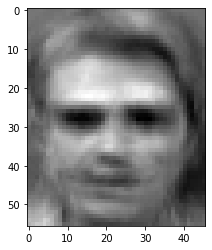

In [12]:
F, A,communality_vector, Psi,eigVal, eigVect, eigenvalues_selected = FA(X.T, 15)

first_PC = F@A
first_PC=first_PC.T[0]
first_PC_array=first_PC.reshape(56,46).real
min_first_PC_array = np.min(first_PC_array)
range_first_PC_array = np.max(first_PC_array) - np.min(first_PC_array)
for i, j in enumerate(first_PC_array):
    first_PC_array[i] = 255 * ((j - min_first_PC_array) / range_first_PC_array)
    
imgplot = plt.imshow(first_PC_array, cmap='gray', vmin=0, vmax=255)
plt.show()

# Q3

In [13]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [14]:
data = pd.read_csv(r"E:\course\資料分析\Homework\hw5\auto-mpg.data.csv")
data.columns = data.columns.str.strip()
data=data.astype(float)
data.isnull().sum()
data[0:6]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
5,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0


Text(0.5, 1.0, 'mpg')

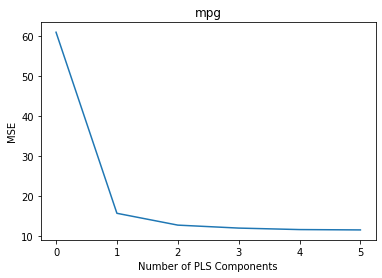

In [15]:
#define predictor and response variables
X = data[["cylinders", "displacement", "horsepower", "weight","acceleration","model year","origin"]]
y = data[["mpg"]]
#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
n = len(X)

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('mpg')

In [16]:
#split the dataset into training (300) and testing (92) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=(92/392),random_state=0) 

#calculate RMSE
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

np.sqrt(mean_squared_error(y_test, pls.predict(scale(X_test))))


3.256334407342537

RMSE is very small. It means that this model can predict well.

3.708950664725468

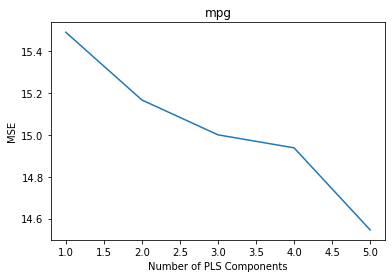

In [17]:
#define predictor and response variables
X = data[["cylinders", "displacement", "horsepower", "weight","acceleration","origin"]]
y = data[["mpg","model year"]]
#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
n = len(X)

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(PLSRegression(n_components=2),
           np.ones((n,1)), y, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('mpg')

#split the dataset into training (300) and testing (92) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=(92/392),random_state=0) 

#calculate RMSE
pls = PLSRegression(n_components=2)
pls.fit(scale(X_train), y_train)

np.sqrt(mean_squared_error(y_test, pls.predict(scale(X_test))))

RMSE is still small but it's larger than (a). All in all, they all perform wonderfully prediction.